# Programming Exercise 2: Logistic Regression

Logistic regression is a classification algorithm.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
 

Number of samples 100
Number of parameters:  2
y shape (100, 1)


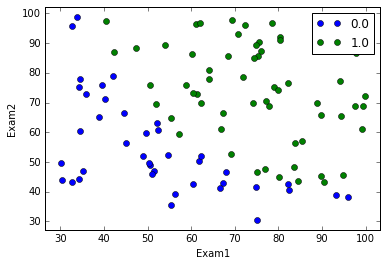

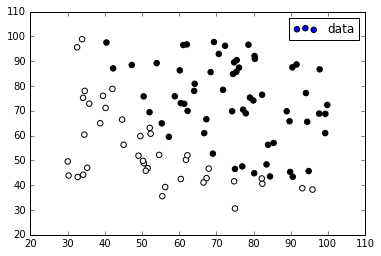

In [3]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

# X represents samples
# y the labels (the classification, supervised)
X = data[:,0:2]
#print('X:', X)
y = data[:, 2:3]
#print('y:', y)
# number of parameters
m,n = X.shape
print('Number of samples', m)
print('Number of parameters: ', n)

print('y shape', y.shape)


df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=data[:,2]))
groups = df.groupby(data[:,2])
#print(list(groups))
plt.margins(0.05)
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend()
plt.show()

plt.scatter(data[:,0] ,data[:,1], c=data[:,2], cmap=plt.cm.binary, s=30, label='data')
plt.legend()
plt.show()

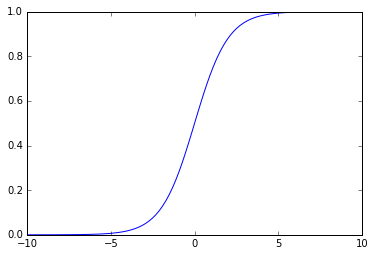

(100, 3)
Theta:  [ 0.  0.  0.]
==== Initial Cost : 0.69314718056
==== Initial Gradient : [-0.001      -0.12009217 -0.11262842]
Theta:  [-5.15114556  0.04784697  0.04086174]
Cost : 0.38799720405


(0, 1)

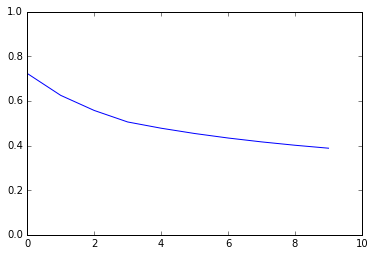

In [4]:
import math
from scipy.special import expit

# Return the sigmoid of a number or a vector
# To optimize on vector, better to use "expit"
def sigmoid(z):
    if (isinstance(z, float) or isinstance(z, int)):
        s = 1 / ( 1 + math.exp(-z))
    else: 
        s = (np.array(list(map(lambda x: sigmoid(x), z))))
    return s


t = np.linspace(-10, 10, 100)
tsigmoid = sigmoid(t)
plt.plot(t, tsigmoid)
plt.show()

# returns Cost and Gradient
def computeCost(theta, X, y):
    # Number of samples (training examples)
    m = y.shape[0]
    #print('y:', y)
    # linear regression with simple least square minimization
    # H = (np.dot(X, theta) - y)
    # J = (np.dot(H.transpose(), H)) / (2*m)
    
    # logistic regression with sigmoid
    H = sigmoid(np.dot(X,theta))
    
    #print('H : ', H)
    #JM = (-y'*log(H) - ( 1 - y')*log(1-H));
    JM = np.array(list(map(lambda x,y : -y*x, map(lambda x: math.log(x), H), y))) - \
         np.array(list(map(lambda x,y : (1-y)*x, map(lambda x: math.log(1-x), H), y)))
    #J = sum(JM)/m;
    J = np.sum(JM) / m
    
    #gradM = (H - y)'*X;
    #grad = gradM/m;
    grad = np.dot( \
                  (np.array(list(map(lambda x,y : x - y, H, y))) / m).transpose(), \
                  X) / m
    grad.shape = ((3,1))
    return J, grad

# same function with numpy code, easier to read, and faster :)
def computeCostOptim(theta, X, y):
    # Number of samples (training examples)
    m = y.shape[0]
    
    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    J = np.sum(-y*(np.log(H)) - (1-y)*np.log(1-H)) / m
    
    grad = np.dot( ((H-y) / m).transpose(), X) / m
    #grad.shape = ((3,1))
    grad.shape = (1,3)
    theta.shape = (1,theta.size)
    return J, grad

# finally split Cost and Gradient : easier to use on personnal descent algo, and required for optimize.fmin function
def computeCostBFGS(theta, X, y):
    # Number of samples (training examples)
    m = y.shape[0]
    
    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    J = np.sum(-y*(np.log(H)) - (1-y)*np.log(1-H)) / m
    
    theta.shape = (1,theta.size)
    theta = np.ndarray.flatten(theta[0])

    return J


def computeGradientBFGS(theta, X, y):
    # Number of samples (training examples)
    m = y.shape[0]

    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    grad = np.dot( ((H-y) / m).transpose(), X) / m
    grad.shape = (grad.size, 1)
    theta.shape = (theta.size)
    theta = np.ndarray.flatten(theta)
    grad = np.ndarray.flatten(grad)
    
    return grad


# prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
# we have n+1 parameters because of the "dummy parameter"
theta = np.zeros(n+1)

# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X.shape)

print('Theta: ', theta)
#cost, grad = computeCostOptim(theta, X, y)
cost = computeCostBFGS(theta, X, y)
grad = computeGradientBFGS(theta, X, y)
print('==== Initial Cost :', cost)
print('==== Initial Gradient :', grad)
alpha = 0.11
cost_evolution = []
# Number of samples (training examples)
m = y.shape[0]

for i in range(100000):
    theta = theta - alpha*grad
    if i%10000 == 0:
        #cost, grad = gradientDescent(theta, X, y, m, True)
        cost = computeCostBFGS(theta, X, y)
        grad = computeGradientBFGS(theta, X, y)
        cost_evolution.append(cost)
    else:
        #cost, grad = gradientDescent(theta, X, y, m, False)
        grad = computeGradientBFGS(theta, X, y)
        
print('Theta: ', theta)
print('Cost :', cost)

plt.plot(range(len(cost_evolution)), cost_evolution)
plt.xlim((0,len(cost_evolution)))
plt.ylim((0, 1))



## Optimizations
#500000 iterations : 15 minutes on DELL
#1000 iterations : 3 sec on MB
#10000 iterations : 10 sec on MB after 1st optimization
#10000 iterations : 1 sec on MB after expit (sigmoid) optimization
#100000 iterations : 3 sec on MB
#1000000 iterations : 17 sec on MB


### Results
Solution for Theta after 10M iterations :
[-25.06765322, 0.20548237, 0.2007136 ]

Test on a specific value to know wether it is class 0 or class 1


## Let's use fmin (not fmin_bfgs : I was never able to use it :( )

In [5]:
from scipy import optimize

# prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
# we have n+1 parameters because of the "dummy parameter"
init_theta = np.zeros((n+1))
theta = optimize.fmin_ncg(computeCostBFGS, x0=init_theta, args=(X,y), fprime=computeGradientBFGS)
print('SOLUTION : ', theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 134
         Hessian evaluations: 0
SOLUTION :  [-25.10267252   0.20576273   0.20099669]


## Plot the decision boundary


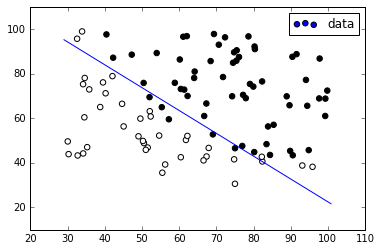

In [6]:
def plotTrainingDataset(data):
    plt.scatter(data[:,0] ,data[:,1], c=data[:,2], cmap=plt.cm.binary, s=30, label='data')
    plt.legend()

def plotDecisionBoundary(theta, X):
    # draw the line according to theta parameters
    plot_x = [min(X[:,1])-1, max(X[:,1]+1)]
    #print('plot_x:',plot_x)

    plot_y = (-1/theta[2]) * (np.multiply(theta[1],plot_x) + theta[0])
    #print('plot_y:',plot_y)

    plt.plot(plot_x, plot_y)

    plt.show()

plotTrainingDataset(data)
plotDecisionBoundary(theta, X)

## We can rerun our gradient descent to iteratively plot the decision boundary

Number of samples 100
Number of parameters:  2
y shape (100, 1)
(100, 3)
Theta:  [ 0.  0.  0.]
==== Initial Cost : 0.69314718056
==== Initial Gradient : [-0.001      -0.12009217 -0.11262842]


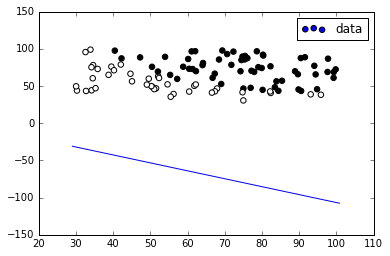

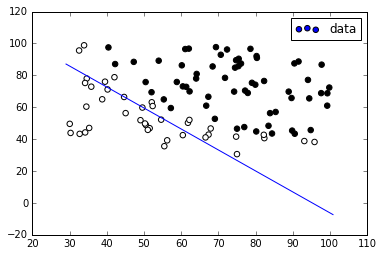

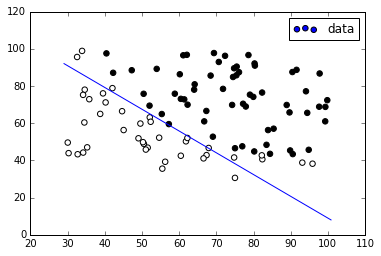

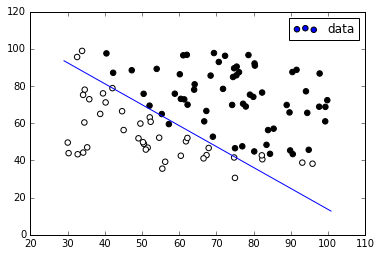

Theta:  [-7.86800847  0.0687535   0.062291  ]
Cost : 0.312452923392


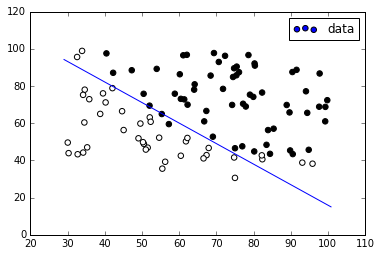

In [8]:
# prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
# we have n+1 parameters because of the "dummy parameter"
X = data[:,0:2]
#print('X:', X)
y = data[:, 2:3]
#print('y:', y)
# number of parameters
m,n = X.shape
print('Number of samples', m)
print('Number of parameters: ', n)

print('y shape', y.shape)

theta = np.zeros(n+1)

# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X.shape)

print('Theta: ', theta)
#cost, grad = computeCostOptim(theta, X, y)
cost = computeCostBFGS(theta, X, y)
grad = computeGradientBFGS(theta, X, y)
print('==== Initial Cost :', cost)
print('==== Initial Gradient :', grad)
alpha = 0.11
cost_evolution = []
# Number of samples (training examples)
m = y.shape[0]

for i in range(200000):
    theta = theta - alpha*grad
    if i%10000 == 0:
        #cost, grad = gradientDescent(theta, X, y, m, True)
        cost = computeCostBFGS(theta, X, y)
        grad = computeGradientBFGS(theta, X, y)
        cost_evolution.append(cost)
        if i%50000 == 0:
            plotTrainingDataset(data)
            plotDecisionBoundary(theta, X)
    else:
        #cost, grad = gradientDescent(theta, X, y, m, False)
        grad = computeGradientBFGS(theta, X, y)
        
print('Theta: ', theta)
print('Cost :', cost)

plotTrainingDataset(data)
plotDecisionBoundary(theta, X)


## Prediction


In [9]:
#recompute a very precise theta (manually it takes too long)
X = data[:,0:2]
# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X))
y = data[:, 2:3]
init_theta = np.zeros((n+1))
theta = optimize.fmin_ncg(computeCostBFGS, x0=init_theta, args=(X,y), fprime=computeGradientBFGS)
print('theta', theta)

def predict(theta, x):
    h = sigmoid( np.dot(x, theta) )
    if ( h >= 0.5 ):
        return 1
    else:
        return 0
    
x = [1,50,50]
print(predict(theta, x))
x = [1,100,100]
print(predict(theta, x))
x = [1,70,50]
print(predict(theta, x))
x = [1,70,54]
print(predict(theta, x))


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 134
         Hessian evaluations: 0
theta [-25.10267252   0.20576273   0.20099669]
0
1
0
1


### We can easily input a vector of test set in predict :

In [10]:
def predict(theta, X):
    h = sigmoid( np.dot(X, theta))
    # time to use a lambda :)
    p = list(map(lambda x : (x >= 0.5)*1, h))
    return p
    

In [11]:
X_test = [
    [1,50,50],
    [1,100,100],
    [1,70,50],
    [1,70,54]]

print(predict(theta, X_test))

[0, 1, 0, 1]
